In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from math import sqrt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

# EDA

In [2]:
data = pd.read_csv('data/medications.csv', sep=',')

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.describe()

,FDA,PubMed,EMA,drugs.com,WHO,RxList,Target
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,0.382322,290.024494,0.682641,0.705005,0.221512,0.644302,0.678381
std,0.486213,571.783870,0.465696,0.456283,0.415486,0.478979,0.467346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,53.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,281.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,6388.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.head()

,FDA,PubMed,EMA,drugs.com,WHO,RxList,Target
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,74,0,1,0,0,0
3,0,20,0,0,0,0,0
4,0,0,0,0,0,0,0


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   FDA        939 non-null    int64
 1   PubMed     939 non-null    int64
 2   EMA        939 non-null    int64
 3   drugs.com  939 non-null    int64
 4   WHO        939 non-null    int64
 5   RxList     939 non-null    int64
 6   Target     939 non-null    int64
dtypes: int64(7)
memory usage: 51.5 KB


In [141]:
data.isnull().sum()

FDA          0
PubMed       0
EMA          0
drugs.com    0
WHO          0
RxList       0
Target       0
dtype: int64

## Correlation matrix

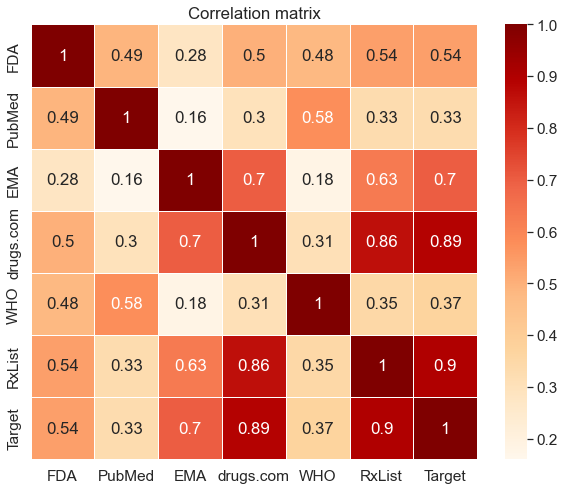

In [140]:
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)

corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 2)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='OrRd')
plt.title('Correlation matrix')
plt.show()

## PubMed results distribution among classes

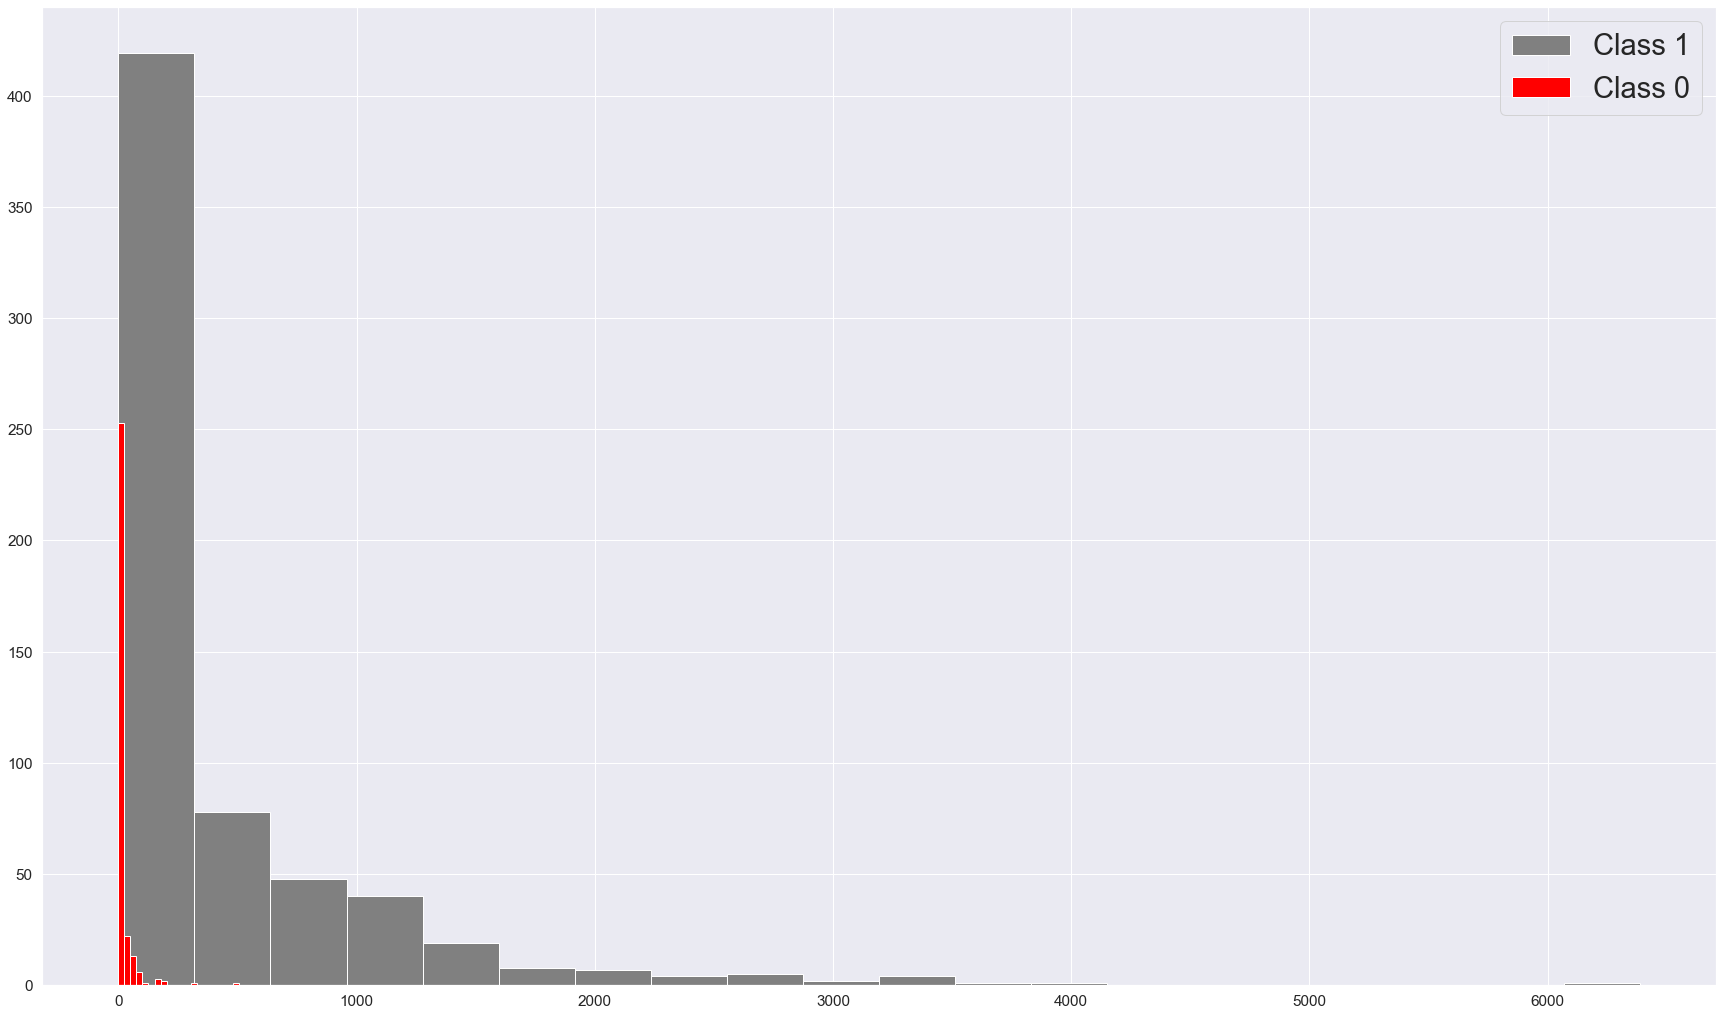

In [270]:
plt.figure(figsize = (30, 18))
plt.hist(data.loc[data['Target'] == 1, 'PubMed'], bins=20, color='grey', edgecolor='white', label='Class 1')
plt.hist(data.loc[data['Target'] == 0, 'PubMed'], bins=20, color='red', edgecolor='white', label='Class 0')
plt.legend(loc="upper right", fontsize='xx-large')
plt.show()

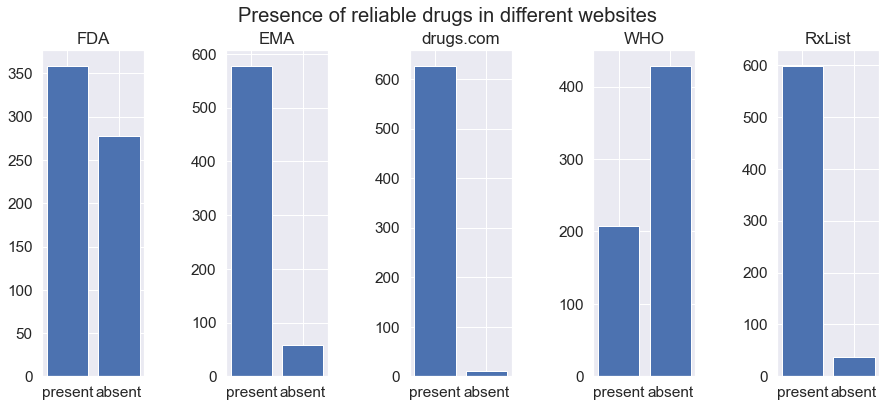

In [271]:
feauters = ['FDA', 'EMA', 'drugs.com', 'WHO', 'RxList']
fig, ax = plt.subplots(nrows=1, ncols=5)
ax1, ax2, ax3, ax4, ax5 = ax.flatten()
g = [ax1, ax2, ax3, ax4, ax5]
fig.set_size_inches(15, 6)
fig.subplots_adjust(wspace=0.8)

x = ['present', 'absent']

for f, g in zip(feauters, g):
    y = [len(data.loc[(data[f] == 1) & (data['Target'] == 1), f]), len(data.loc[(data[f] == 0) & (data['Target'] == 1), f])]
    g.bar(x, y)
    g.set_title(f)
fig.suptitle('Presence of reliable drugs in different websites')
plt.show()

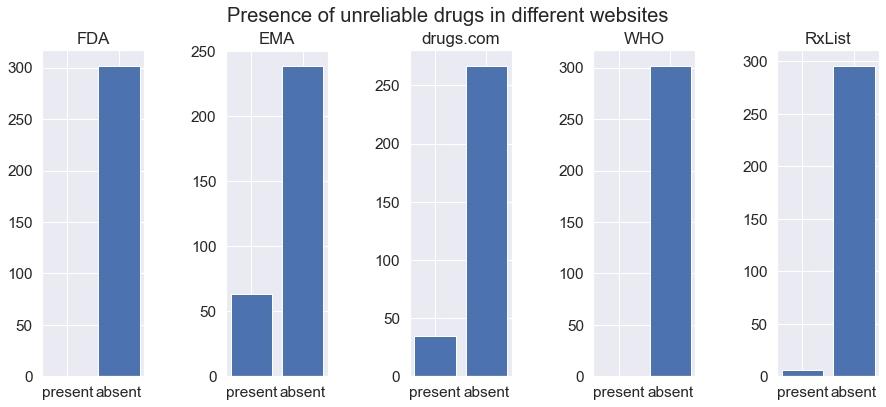

In [272]:
fig, ax = plt.subplots(nrows=1, ncols=5)
ax1, ax2, ax3, ax4, ax5 = ax.flatten()
g = [ax1, ax2, ax3, ax4, ax5]
fig.set_size_inches(15, 6)
fig.subplots_adjust(wspace=0.8)

x = ['present', 'absent']

for f, g in zip(feauters, g):
    y = [len(data.loc[(data[f] == 1) & (data['Target'] == 0), f]), len(data.loc[(data[f] == 0) & (data['Target'] == 0), f])]
    g.bar(x, y)
    g.set_title(f)
fig.suptitle('Presence of unreliable drugs in different websites')
plt.show()

# Logistic Regression

#### Let's look how Logistic Regression can perform on scaled and not scaled data

In [90]:
FEATURE_NAMES = ['FDA', 'PubMed', 'EMA', 'drugs.com', 'WHO', 'RxList']

In [91]:
X = data[FEATURE_NAMES]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=False)

In [92]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
print(f'Accuracy on the train dataset - {accuracy_score(y_train, train_pred)}')
print(f'Accuracy on the test dataset - {accuracy_score(y_test, test_pred)}')

Accuracy on scaled train dataset - 0.9680426098535286
Accuracy on scaled test dataset - 0.9468085106382979


In [93]:
scores_train = cross_val_score(lr, X_train, y_train, cv=3) 
print("Cross Validation scores on the train dataset: {}".format(scores_train))
scores_test = cross_val_score(lr, X_test, y_test, cv=3) 
print("Cross Validation scores on the test dataset: {}".format(scores_test))

Cross Validation scores on the train dataset: [0.97211155 0.964      0.952     ]
Cross Validation scores on the test dataset: [0.96825397 0.96825397 0.9516129 ]


#### Now we scale the data

In [94]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [95]:
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)
scaled_train_pred = lr_scaled.predict(X_train_scaled)
scaled_test_pred = lr_scaled.predict(X_test_scaled)
print(f'Accuracy on the scaled train dataset - {accuracy_score(y_train, scaled_train_pred)}')
print(f'Accuracy on the scaled test dataset - {accuracy_score(y_test, scaled_test_pred)}')

Accuracy on the scaled train dataset - 0.9707057256990679
Accuracy on the scaled test dataset - 0.9627659574468085


In [96]:
scores_train = cross_val_score(lr_scaled, X_train_scaled, y_train, cv=3) 
print("Cross Validation scores on the scaled train dataset: {}".format(scores_train))
scores_test = cross_val_score(lr_scaled, X_test_scaled, y_test, cv=3) 
print("Cross Validation scores on the scaled test dataset: {}".format(scores_test))

Cross Validation scores on the scaled train dataset: [0.97211155 0.964      0.96      ]
Cross Validation scores on the scaled test dataset: [0.95238095 0.98412698 0.9516129 ]


#### As we can see there is no big difference in the results. But what kind of mistakes our models do?

In [97]:
proba = [p[1] for p in lr.predict_proba(X_test)]
errors = X_test.copy()
errors['target'] = y_test
errors['predictions'] = test_pred
errors['probability'] = proba
errors.loc[((errors['target'] == 0) & (errors['predictions'] == 1)) | ((errors['target'] == 1) & (errors['predictions'] == 0))]

,FDA,PubMed,EMA,drugs.com,WHO,RxList,target,predictions,probability
415,0,6,1,1,0,0,0,1,0.504867
771,0,65,0,0,1,0,1,0,0.034302
338,0,7,1,1,0,0,0,1,0.506276
483,0,69,1,0,1,0,1,0,0.366797
548,0,24,1,1,0,0,0,1,0.530183
385,0,43,1,0,1,0,1,0,0.333486
717,0,4,1,1,0,0,0,1,0.502051
325,0,4,1,1,0,0,0,1,0.502051
766,0,8,1,0,0,1,0,1,0.690306
283,0,13,1,0,1,0,1,0,0.297031


In [99]:
proba = [p[1] for p in lr_scaled.predict_proba(X_test_scaled)]
errors_sc = X_test.copy()
errors_sc['target'] = y_test
errors_sc['predictions'] = scaled_test_pred
errors_sc['probability'] = proba
errors_sc.loc[((errors_sc['target'] == 0) & (errors_sc['predictions'] == 1)) | ((errors_sc['target'] == 1) & (errors_sc['predictions'] == 0))]

,FDA,PubMed,EMA,drugs.com,WHO,RxList,target,predictions,probability
415,0,6,1,1,0,0,0,1,0.521441
771,0,65,0,0,1,0,1,0,0.050812
338,0,7,1,1,0,0,0,1,0.521931
548,0,24,1,1,0,0,0,1,0.530248
717,0,4,1,1,0,0,0,1,0.520462
325,0,4,1,1,0,0,0,1,0.520462
766,0,8,1,0,0,1,0,1,0.739777


 The model based on unscaled data underestimates the presence of the drug in PubMed and WHO. This is because the default l2 regularization focuses on PubMed results, which is the only feature that has no limit on values.
 Meanwhile, another model built on scaled data is more objective and can see the importance of all features.
 
 We also see that both models have similar errors. Most of them happened because the models weren't sure about medications that have probabilities of about 0.5. But the fact is that I also cannot say with certainty whether these drugs can be trusted or not. Thus, our application should recommend manually checking drugs, which will have a probability score of around 0.35–0.55.

#### Let's look at the models coefficients 

In [107]:
coefficients = pd.DataFrame({'FEATURE_NAMES': FEATURE_NAMES})
coefficients['not scaled'] = lr.coef_[0]
coefficients['scaled'] = lr_scaled.coef_[0]
coefficients

,FEATURE_NAMES,not scaled,scaled
0,FDA,1.503314,1.447904
1,PubMed,0.005634,1.105639
2,EMA,2.769131,1.796115
3,drugs.com,2.387331,1.316548
4,WHO,1.466950,1.455726
5,RxList,3.158145,1.831621


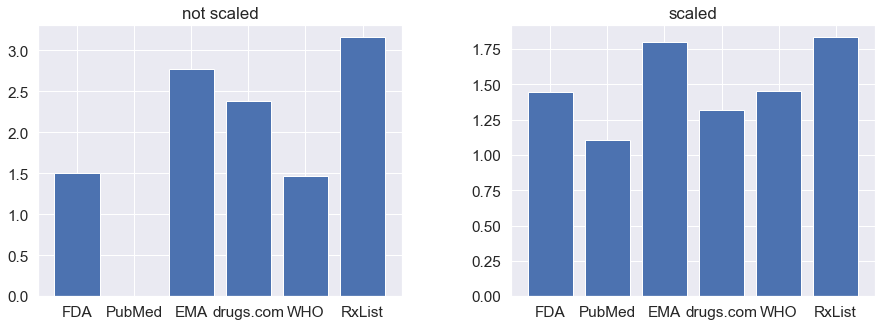

In [278]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = ax.flatten()
g = [ax1, ax2]

fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.3)

for f, g in zip(coefficients.columns[1:], g):
    g.bar(coefficients['FEATURE_NAMES'], coefficients[f])
    g.set_title(f)

plt.show()

In conclusion:
> - The basic model will be Logistic regression
> - Predictions will include 'Reliable', 'Unreliable', 'Additional check required' (or something like that)
> - We need to use scaling of our data

#### Preparing our finalized model and scaler

In [126]:
scaler = scaler.fit(X)
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [127]:
X_scaled = scaler.transform(X)

In [128]:
final_lr = LogisticRegression()
final_lr.fit(X_scaled, y)
scaled_train_pred = final_lr.predict(X_train_scaled)
scaled_test_pred = final_lr.predict(X_test_scaled)
print(f'Accuracy on the scaled train dataset - {accuracy_score(y_train, scaled_train_pred)}')
print(f'Accuracy on the scaled test dataset - {accuracy_score(y_test, scaled_test_pred)}')

Accuracy on the scaled train dataset - 0.9707057256990679
Accuracy on the scaled test dataset - 0.9627659574468085


In [129]:
filename = 'finalized_model.sav'
pickle.dump(final_lr, open(filename, 'wb'))